In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Cargamos las tablas limpias en .parquet

In [3]:
items_games = pd.read_parquet('items_games.parquet')
reviews_games = pd.read_parquet('reviews_games.parquet')

In [4]:
items_games

,user_id,item_id,title,playtime_forever,genres,release_date,year_release
0,76561197970982479,10,Counter-Strike,6,Action,2000-11-01,2000
1,js41637,10,Counter-Strike,0,Action,2000-11-01,2000
2,Riot-Punch,10,Counter-Strike,0,Action,2000-11-01,2000
3,doctr,10,Counter-Strike,93,Action,2000-11-01,2000
4,corrupted_soul,10,Counter-Strike,108,Action,2000-11-01,2000
...,...,...,...,...,...,...,...
7471244,76561198071808318,444770,Mimpi Dreams,46,Indie,2016-03-22,2016
7471245,76561198107283457,354280,ChaosTower,164,Action,2016-02-23,2016
7471246,76561198107283457,354280,ChaosTower,164,Casual,2016-02-23,2016
7471247,76561198107283457,354280,ChaosTower,164,Indie,2016-02-23,2016


In [5]:
reviews_games

,user_id,posted,item_id,recommend,sentiment_analysis,year_posted,title,genres,release_date,year_release
0,76561197970982479,2011-11-05,1250,1,2,2011,Killing Floor,Action,2009-05-14,2009
1,death-hunter,2015-03-30,1250,1,2,2015,Killing Floor,Action,2009-05-14,2009
2,DJKamBer,2013-07-12,1250,1,0,2013,Killing Floor,Action,2009-05-14,2009
3,diego9031,2015-08-13,1250,1,1,2015,Killing Floor,Action,2009-05-14,2009
4,76561198081962345,2014-04-05,1250,1,1,2014,Killing Floor,Action,2009-05-14,2009
...,...,...,...,...,...,...,...,...,...,...
101626,Gamer0009,2015-08-11,306040,1,2,2015,The Howler,Simulation,2016-04-21,2016
101627,Gamer0009,2015-08-11,306040,1,2,2015,The Howler,Strategy,2016-04-21,2016
101628,llDracuwulf,2015-10-29,307130,1,2,2015,Asteria,Action,2014-07-03,2014
101629,llDracuwulf,2015-10-29,307130,1,2,2015,Asteria,Adventure,2014-07-03,2014


Imprimimos la cantidad de valores únicos de cada DF

In [11]:
# Valores únicos del dataframe 'items_games'
for col in items_games.columns:
    print(f'{col}: {items_games[col].nunique()}')

user_id: 67681
item_id: 7238
title: 7235
playtime_forever: 6405
genres: 21
release_date: 2242
year_release: 34


In [14]:
# Valores únicos del dataframe 'reviews_games'
for col in reviews_games.columns:
    print(f'{col}: {reviews_games[col].nunique()}')

user_id: 20618
posted: 1614
item_id: 2441
recommend: 2
sentiment_analysis: 3
year_posted: 6
title: 2441
genres: 20
release_date: 1420
year_release: 29


**Géneros más polupares por minutos de juego**

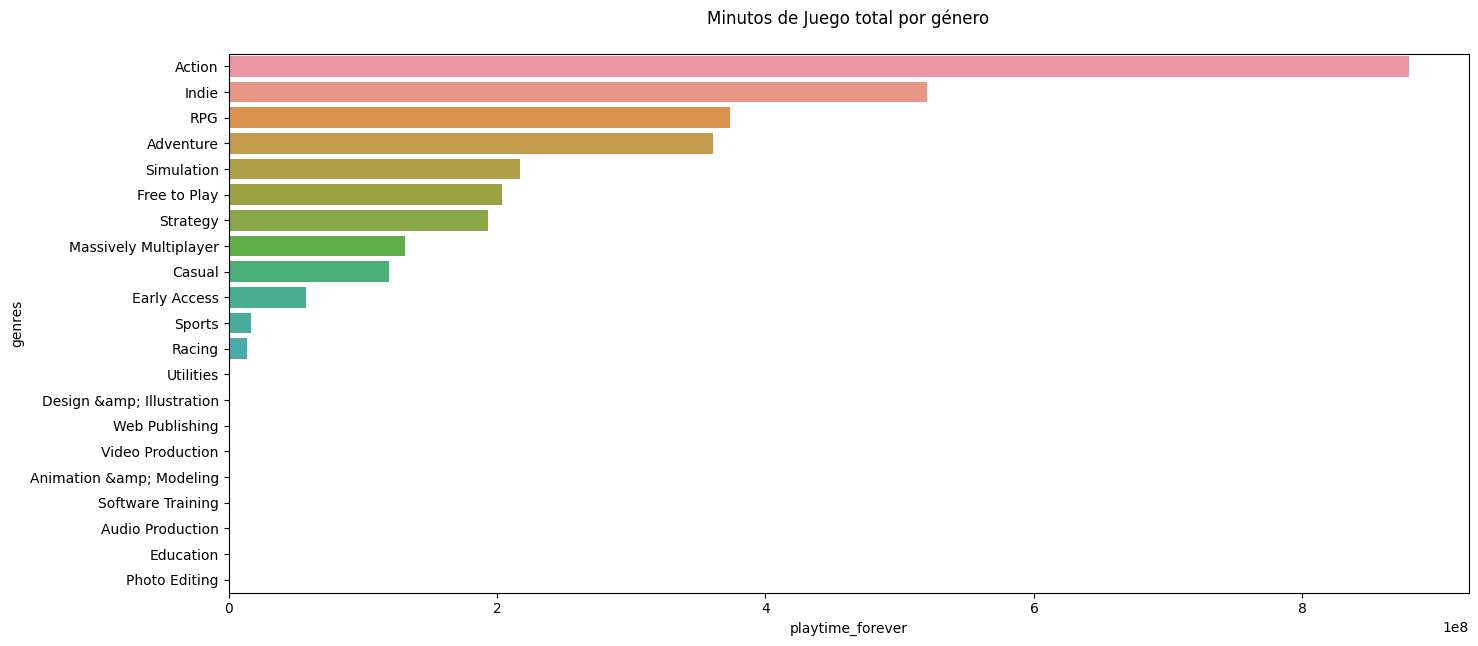

In [15]:
# Agrupamos 'items_games' por géneros y sumamos los minutos de juego
data = items_games[['genres', 'playtime_forever']].groupby('genres').sum('playtime_forever').sort_values(by='playtime_forever', ascending=False)

# Hacemos un gráfico de barras
plt.figure(figsize=(16,7))
sns.barplot(data=data, y=data.index, x='playtime_forever')
plt.title('Minutos de Juego total por género\n')
plt.show()